# **Variáveis do dataset**

**step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo é 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. 
(caixa-de-entrada, caixa-de-saida, débito, pagamento e transferência)

**amount** - valor da transação em moeda local.

**nameOrig** - cliente que iniciou a transação

**oldbalanceOrg** - saldo inicial antes da transação

**newbalanceOrig** - novo saldo após a transação

**nameDest** - cliente que é o destinatário da transação

**oldbalanceDest** - destinatário do saldo inicial antes da transação. 
Observe que não há informações para clientes que começam com M (Comerciantes).

**newbalanceDest** - novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).

**isFraud** - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema.

**isFlaggedFraud** - O modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação


# Importando os dados

In [6]:
import pandas as pd 
import numpy as np

In [7]:
# Importando dados com pandas
df = pd.read_csv("fraud_dataset_example.csv")

# Monstrando as primeiras linhas
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Tratamento de dados

### Renomeando as colunas

In [8]:
df.columns = ["tempo", 
              "tipo",
              "valor",
              "cliente_1",
              "saldo_inicial_c1",
              "novo_saldo_c1",
              "cliente_2",
              "saldo_inicial_c2",
              "novo_saldo_c2",
              "fraude",
              "possivel_fraude"]

df

,tempo,tipo,valor,cliente_1,saldo_inicial_c1,novo_saldo_c1,cliente_2,saldo_inicial_c2,novo_saldo_c2,fraude,possivel_fraude
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


### Nulos

In [9]:
df.isnull().sum()

tempo               0
tipo                0
valor               0
cliente_1           0
saldo_inicial_c1    0
novo_saldo_c1       0
cliente_2           0
saldo_inicial_c2    0
novo_saldo_c2       0
fraude              0
possivel_fraude     0
dtype: int64

### Na

In [10]:
df.isna().sum()

tempo               0
tipo                0
valor               0
cliente_1           0
saldo_inicial_c1    0
novo_saldo_c1       0
cliente_2           0
saldo_inicial_c2    0
novo_saldo_c2       0
fraude              0
possivel_fraude     0
dtype: int64

### Duplicados

In [11]:
df.duplicated().sum()

0

### Removendo variáveis

In [12]:
df = df.drop(columns=['cliente_1', 'cliente_2', 'possivel_fraude'])

### Get Dummies em tipo

In [13]:
df = pd.get_dummies(data=df, columns=['tipo'])

df.head()

,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,fraude,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


# Analisando algumas informações

In [14]:
# from ydata_profiling import ProfileReport

# Gerar o relatório em português
# profile = ProfileReport(df, explorative=True)

# profile.to_file("relatorio.html")

# profile

# Variáveis

### X

In [15]:
# Variáveis explicativas
x = df.drop(columns="fraude")

x

,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,False,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,False,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,7477.02,785.00,0.00,0.00,0.00,False,False,False,True,False
101609,10,282252.35,220339.29,0.00,95156.01,91286.97,False,True,False,False,False
101610,10,17289.01,0.00,0.00,0.00,0.00,False,False,False,True,False
101611,10,1347146.45,1605.00,0.00,541639.43,2186953.43,False,False,False,False,True


### Y

In [16]:
# Variável alvo
y = df["fraude"]

y

0         0
1         0
2         1
3         1
4         0
         ..
101608    0
101609    0
101610    0
101611    0
101612    0
Name: fraude, Length: 101613, dtype: int64

# Treino e Teste

In [17]:
# Importação
from sklearn.model_selection import train_test_split

# Treino e Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

# Função para validação de modelo

In [18]:
def avaliacao(y_real, y_pred):
    from sklearn.metrics import classification_report
    from sklearn.metrics import ConfusionMatrixDisplay
    from sklearn.metrics import RocCurveDisplay
    
    print(classification_report(y_pred, y_real))
    RocCurveDisplay.from_predictions(y_pred, y_real)
    ConfusionMatrixDisplay.from_predictions(y_pred, y_real)

# Regressão logística com SMOTE

In [19]:
from imblearn.pipeline import Pipeline  # Importação correta do Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Criando pipeline corretamente
pipeline_SMOTE = Pipeline([
    ('scaler', StandardScaler()),  # Normaliza os dados
    ('oversample', SMOTE()),       # Aplica SMOTE corretamente dentro do pipeline
    ('log_reg', LogisticRegression(solver='liblinear', C=0.1))  # Modelo de regressão logística
])

# Treinando o pipeline
pipeline_SMOTE.fit(X_treino, y_treino)

previsao_LR_SMOTE = pipeline_SMOTE.predict(X_teste)

### Métricas

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     25375
           1       0.01      0.83      0.03        29

    accuracy                           0.93     25404
   macro avg       0.51      0.88      0.49     25404
weighted avg       1.00      0.93      0.96     25404



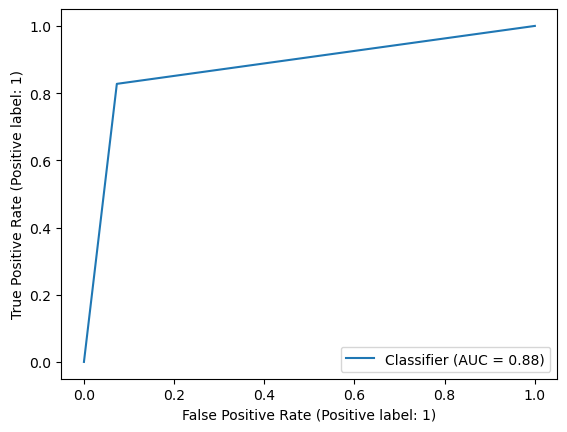

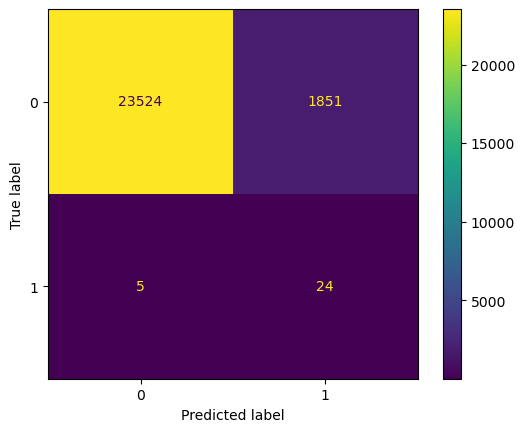

In [20]:
avaliacao(previsao_LR_SMOTE, y_teste)

# Regressão com undersample

In [21]:
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler

# Criando pipeline corretamente
pipeline_NearMiss = Pipeline([
    ('scaler', StandardScaler()),  # Normaliza os dados
    ('oversample', NearMiss()),       # Aplica SMOTE corretamente dentro do pipeline
    ('log_reg', LogisticRegression(solver='liblinear', C=0.1))  # Modelo de regressão logística
])

# Treinando o pipeline
pipeline_NearMiss.fit(X_treino, y_treino)

previsao_LR_NearMiss = pipeline_NearMiss.predict(X_teste)

### Métricas

              precision    recall  f1-score   support

           0       1.00      0.53      0.69     25375
           1       0.00      0.55      0.00        29

    accuracy                           0.53     25404
   macro avg       0.50      0.54      0.35     25404
weighted avg       1.00      0.53      0.69     25404



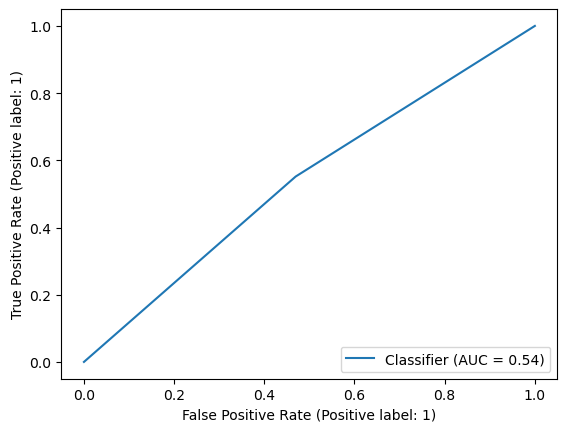

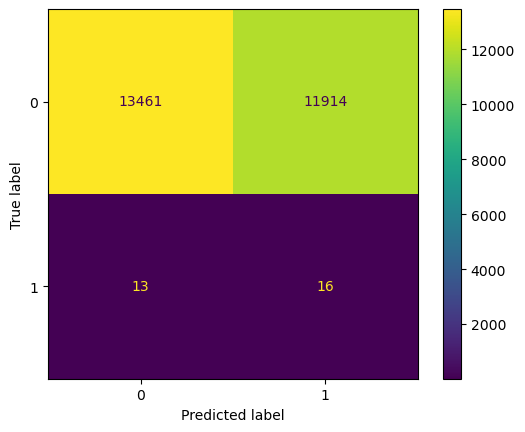

In [22]:
avaliacao(previsao_LR_NearMiss, y_teste)

# Árvore de decisão

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Modelo
pipeline_DTC = Pipeline([("SMOTE", SMOTE()), ("StanderScaler", StandardScaler()), ("DecisionTree", DecisionTreeClassifier(max_depth=5))]).fit(X_treino, y_treino)

# Previsão
previsao_DTC_SMOTE = pipeline_DTC.predict(X_teste)

# Métricas

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     25375
           1       0.03      0.76      0.06        29

    accuracy                           0.97     25404
   macro avg       0.52      0.87      0.52     25404
weighted avg       1.00      0.97      0.99     25404



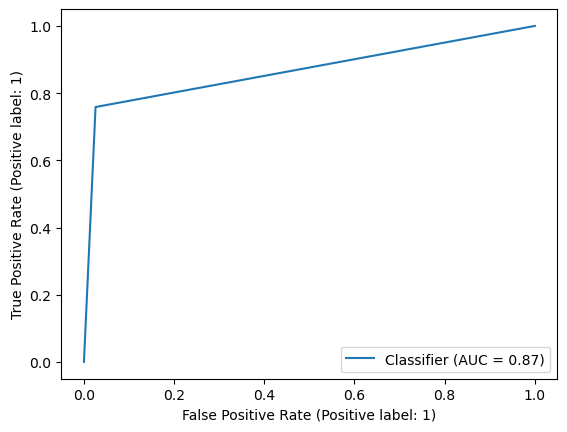

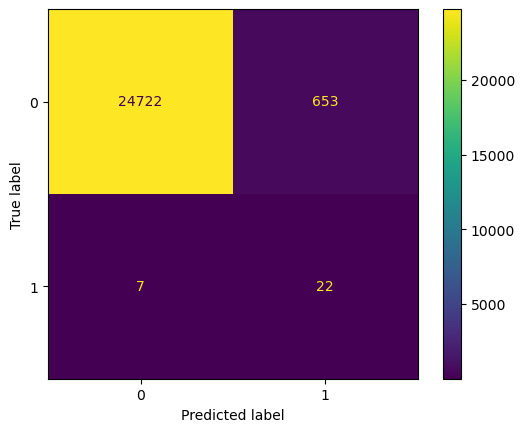

In [24]:
avaliacao(previsao_DTC_SMOTE, y_teste)

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Modelo
pipeline_Rf = Pipeline([("SMOTE", SMOTE()), ("StanderScaler", StandardScaler()), ("Random Forest", RandomForestClassifier(max_depth=10))]).fit(X_treino, y_treino)

# Previsão
previsao_rf = pipeline_Rf.predict(X_teste)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25375
           1       0.12      0.72      0.20        29

    accuracy                           0.99     25404
   macro avg       0.56      0.86      0.60     25404
weighted avg       1.00      0.99      1.00     25404



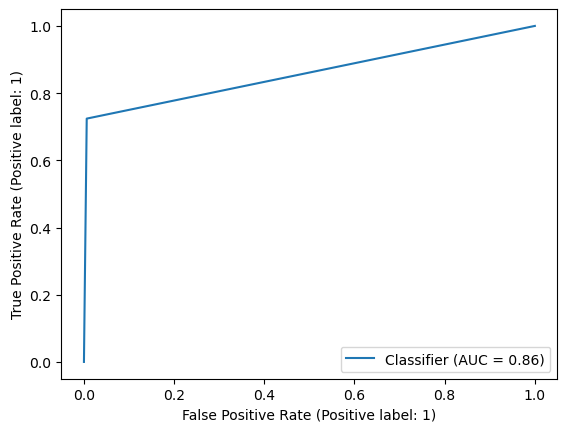

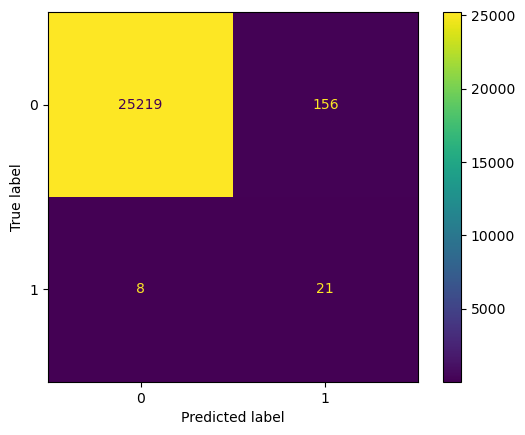

In [26]:
avaliacao(previsao_rf, y_teste)

# Randomized Search CV

In [27]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict, StratifiedKFold

In [28]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [29]:
# parametros
param_dist = {
    'n_estimators': [50, 100, 200],  # Número de árvores (não colocar valores muito altos)
    'max_depth': [None, 10, 20, 30],  # Profundidade da árvore
    'min_samples_split': [2, 5, 10],  # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Mínimo de amostras em um nó folha
    'max_features': ['sqrt', 'log2'],  # Número de features consideradas na divisão
    'bootstrap': [True, False]  # Se deve usar amostragem com reposição
}

In [ ]:
# Definição do Pipeline com SMOTE + RandomizedSearchCV
randomized = Pipeline([
    ("SMOTE", SMOTE()),
    ("Randomized", RandomizedSearchCV(
        estimator=RandomForestClassifier(random_state=0),
        param_distributions=param_dist,
        n_jobs=-1,
        cv=skf,
        n_iter=5
    ))
])

# Ajuste do modelo nos dados de treino
randomized.fit(X_treino, y_treino)